<h1><center><font size=10>Loan Eligibility Prediction Model</center></font></h1>

**Author: Vinayak Hampiholi**

# <a name='link0'>Index</a>

- <a href = #link1>0) Problem Description</a>
    - <a href = #link11>0.1) Context</a>
    - <a href = #link12>0.2) Data Dictionary</a>
    - <a href = #link13>0.3) Objective</a>
    - <a href = #link14>0.4) Installing Packages</a>
    - <a href = #link15>0.5) Importing Packages</a> 
- <a href = #link2>1) Data Understanding and Preparation</a>
    - <a href = #link21>1.1) Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables</a>
    - <a href = #link22>1.2) Print shape and Column Names and DataTypes of both the Dataframes</a>
    - <a href = #link23>1.3) Merge both the Dataframes on ‘ID’ feature to form a single DataFrame</a>
    - <a href = #link24>1.4) Change Datatype of below features to ‘Object’</a>
        - <a href = #link241>1.4.1) CreditCard
        - <a href = #link242>1.4.2) InternetBanking
        - <a href = #link243>1.4.3) FixedDepositAccount
        - <a href = #link244>1.4.4) Security
        - <a href = #link245>1.4.5) Level
        - <a href = #link246>1.4.6) HiddenScore
- <a href = #link3>2) Data Exploration and Analysis</a>
    - <a href = #link31>2.1) Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights</a>
    - <a href = #link32>2.2) Check the percentage of missing values and impute if required</a>
    - <a href = #link33>2.3) Check for unexpected values in each categorical variable and impute with best suitable value</a>
- <a href = #link4>3) Data Preparation and model building</a>
    - <a href = #link41>3.1) Split data into X and Y</a>
    - <a href = #link42>3.2) Split data into train and test. Keep 25% data reserved for testing</a>
    - <a href = #link43>3.3) Train a Supervised Learning Classification base model - Logistic Regression</a>
    - <a href = #link44>3.4) Print evaluation metrics for the model and clearly share insights</a>
    - <a href = #link45>3.5) Balance the data using the right balancing technique</a>
        - <a href = #link451>3.5.1) Check distribution of the target variable</a>
        - <a href = #link452>3.5.2) Say output is class A : 20% and class B : 80%</a>
        - <a href = #link453>3.5.3) Here you need to balance the target variable as 50:50</a>
        - <a href = #link454>3.5.4) Try appropriate method to achieve the same</a>
    - <a href = #link46>3.6) Again train the same previous model on balanced data</a>
    - <a href = #link47>3.7) Print evaluation metrics and clearly share differences observed</a>
- <a href = #link5>4) Performance Improvement</a>
    - <a href = #link51>4.1) Train a base model each for SVM, KNN</a>
    - <a href = #link52>4.2) Tune parameters for each of the models wherever required and finalize a model</a>
    - <a href = #link53>4.3) Print evaluation metrics for final model</a>
    - <a href = #link54>4.4) Share improvement achieved from base model to final model</a>

# <a name='link1'>0) Problem Description</a>

## <a name='link11'>0.1) Context</a>

A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them areliability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

## <a name='link12'>0.2) Data Dictionary</a>

**1. ID:** Customer ID

**2. Age:** Customer’s approximate age.

**3. CustomerSince:** Customer of the bank since. [unit is masked]

**4. HighestSpend:** Customer’s highest spend so far in one transaction. [unit is masked]

**5. ZipCode:** Customer’s zip code.

**6. HiddenScore:** A score associated to the customer which is masked by the bank as an IP.

**7. MonthlyAverageSpend:** Customer’s monthly average spend so far. [unit is masked]

**8. Level:** A level associated to the customer which is masked by the bank as an IP.

**9. Mortgage:** Customer’s mortgage. [unit is masked]

**10. Security:** Customer’s security asset with the bank. [unit is masked]

**11. FixedDepositAccount:** Customer’s fixed deposit account with the bank. [unit is masked]

**12. InternetBanking:** if the customer uses internet banking.

**13. CreditCard:** if the customer uses bank’s credit card.

**14. LoanOnCard:** if the customer has a loan on credit card.

## <a name='link13'>0.3) Objective</a>

Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convertusing the historical dataset.

## <a name='link14'>0.4) Installing Packages</a>

In [338]:
#Uncomment and install the packages if and only if necessary
#%pip install numpy
#%pip install pandas
#%pip install scipy
#%pip install matplotlib
#%pip install seaborn
#%pip install plotly
#%pip install scikit-learn

## <a name='link15'>0.5) Importing Packages</a>

In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# <a name='link2'>1) Data Understanding and Preparation</a>

## <a name='link21'>1.1) Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables</a>

In [340]:
# Read the file 'Data1.csv'
data1 = pd.read_csv("Data1.csv")
data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [341]:
# Read the file 'Data2.csv'
data2 = pd.read_csv("Data2.csv")
data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


## <a name='link22'>1.2) Print shape and Column Names and DataTypes of both the Dataframes</a>

In [342]:
#Printing the shape of both dataframes
print("The file data1.csv contains", data1.shape[0], "rows and", data1.shape[1],"columns")
print("The file data2.csv contains", data2.shape[0], "rows and", data2.shape[1],"columns")

The file data1.csv contains 5000 rows and 8 columns
The file data2.csv contains 5000 rows and 7 columns


In [343]:
#Printing the columns names and datatypes in data1 dataframe
for i in range(0, len(data1.dtypes.index)):
    print("Column Name:", data1.dtypes.index[i], "Data Type:", data1.dtypes.values[i])

Column Name: ID Data Type: int64
Column Name: Age Data Type: int64
Column Name: CustomerSince Data Type: int64
Column Name: HighestSpend Data Type: int64
Column Name: ZipCode Data Type: int64
Column Name: HiddenScore Data Type: int64
Column Name: MonthlyAverageSpend Data Type: float64
Column Name: Level Data Type: int64


In [344]:
#Printing the columns names and datatypes in data2 dataframe
for i in range(0, len(data2.dtypes.index)):
    print("Column Name:", data2.dtypes.index[i], "Data Type:", data2.dtypes.values[i])

Column Name: ID Data Type: int64
Column Name: Mortgage Data Type: int64
Column Name: Security Data Type: int64
Column Name: FixedDepositAccount Data Type: int64
Column Name: InternetBanking Data Type: int64
Column Name: CreditCard Data Type: int64
Column Name: LoanOnCard Data Type: float64


## <a name='link23'>1.3) Merge both the Dataframes on ‘ID’ feature to form a single DataFrame</a>

In [345]:
#Join the rows from data1 and data2 ob the column ID and perform an outer join and store the output in data dataframe
data = pd.merge(data1, data2, how = 'outer', on = 'ID')
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [346]:
#Check the total rows and columns on the data dataframe
data.shape

(5000, 14)

## <a name='link24'>1.4) Change Datatype of below features to ‘Object’</a>

In [347]:
#Check the information of data dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


### <a name='link241'>1.4.1) CreditCard</a>

In [348]:
#Change the datatype from int64 to object for the column CreditCard
data['CreditCard'] = data['CreditCard'].astype(object)

### <a name='link242'>1.4.2) InternetBanking</a>

In [349]:
#Change the datatype from int64 to object for the column InternetBanking
data['InternetBanking'] = data['InternetBanking'].astype(object)

### <a name='link243'>1.4.3) FixedDepositAccount</a>

In [350]:
#Change the datatype from int64 to object for the column FixedDepositAccount
data['FixedDepositAccount'] = data['FixedDepositAccount'].astype(object)

### <a name='link244'>1.4.4) Security</a>

In [351]:
#Change the datatype from int64 to object for the column Security
data['Security'] = data['Security'].astype(object)

### <a name='link245'>1.4.5) Level</a>

In [352]:
#Change the datatype from int64 to object for the column Level
data['Level'] = data['Level'].astype(object)

### <a name='link246'>1.4.6) HiddenScore</a>

In [353]:
#Change the datatype from int64 to object for the column HiddenScore
data['HiddenScore'] = data['HiddenScore'].astype(object)

In [354]:
#Check the information of data dataframe and verify the changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


In [355]:
#Check the data of the dataframe data to verify the column joining
data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


# <a name='link3'>2) Data Preparation and model building</a>

## <a name='link31'>2.1) Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights</a>

In [356]:
#Check the distinct values for the column LoanOnCard
data['LoanOnCard'].value_counts()

LoanOnCard
0.0    4500
1.0     480
Name: count, dtype: int64

**Observations:**
- There are 4500 rows with the value 0 for the column LoanOnCard
- There are 480 rows with the value 1 for the column LoanOnCard

## <a name='link32'>2.2) Check the percentage of missing values and impute if required</a>

In [357]:
#Check the missing values in all columns and print the total null values for each column
data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

**Observations:**
- Null values exist only in the LoanOnCard column and we can replace the values with the mode.

In [358]:
#Change the null values with the mode
data['LoanOnCard'] = data['LoanOnCard'].fillna(data['LoanOnCard'].mode()[0])

In [359]:
data.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [360]:
#Validate the shape of the data dataframe
data.shape

(5000, 14)

**Observations:**
- All null values are treated

## <a name='link33'>2.3) Check for unexpected values in each categorical variable and impute with best suitable value</a>

In [361]:
#Check the data dataframe and list the columns and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


In [362]:
#Check the unique values for categorical value HiddenScore
data['HiddenScore'].value_counts()

HiddenScore
1    1472
2    1296
4    1222
3    1010
Name: count, dtype: int64

In [363]:
#Check the unique values for categorical value Level
data['Level'].value_counts()

Level
1    2096
3    1501
2    1403
Name: count, dtype: int64

In [364]:
#Check the unique values for categorical value Security
data['Security'].value_counts()

Security
0    4478
1     522
Name: count, dtype: int64

In [365]:
#Check the unique values for categorical value FixedDepositAccount
data['FixedDepositAccount'].value_counts()

FixedDepositAccount
0    4698
1     302
Name: count, dtype: int64

In [366]:
#Check the unique values for categorical value InternetBanking
data['InternetBanking'].value_counts()

InternetBanking
1    2984
0    2016
Name: count, dtype: int64

In [367]:
#Check the unique values for categorical value CreditCard
data['CreditCard'].value_counts()

CreditCard
0    3530
1    1470
Name: count, dtype: int64

**Observations:**
- There are no unexpected values in categorical values

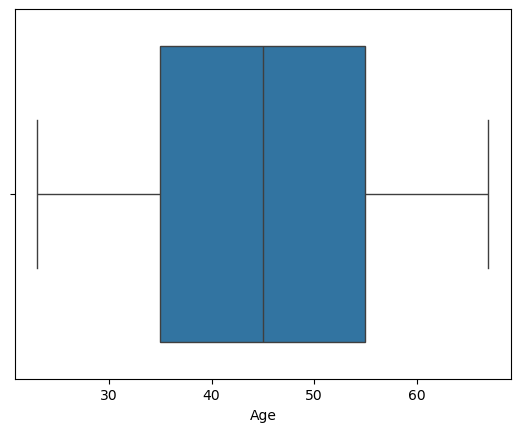

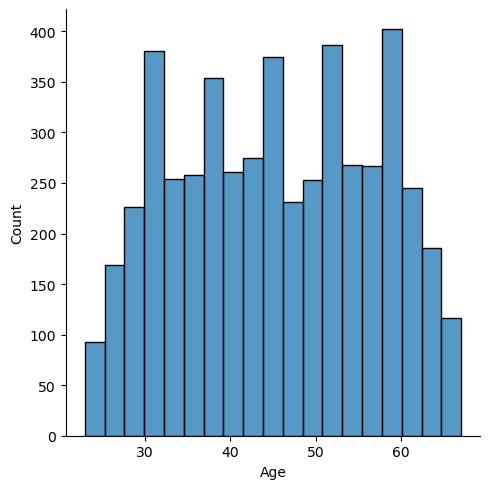

In [368]:
#Plot the boxplot and histogram for the column Age and identify the outliers 
sns.boxplot(x = 'Age', data = data,  orient = 'h')
plt.show()
sns.displot(x = data['Age'])
plt.show()

In [369]:
#Calculate the total outliers
q25, q75 = np.percentile(data['Age'],25),np.percentile(data['Age'], 75)
IQR = q75 - q25
Threshold = IQR * 1.5
lower, upper = q25 - Threshold, q75 + Threshold
Outliers=[i for i in data['Age'] if i < lower or i > upper]
print('Total Number of outliers in Age: {}'.format(len(Outliers)))

Total Number of outliers in Age: 0


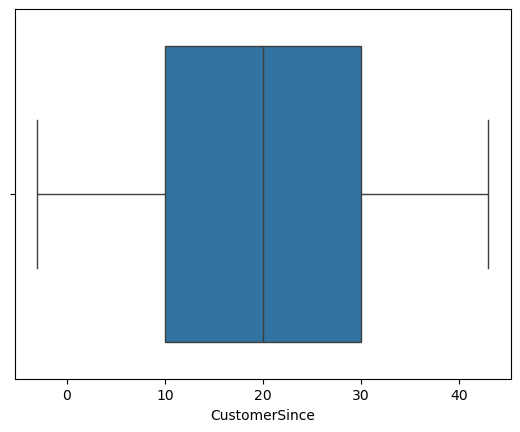

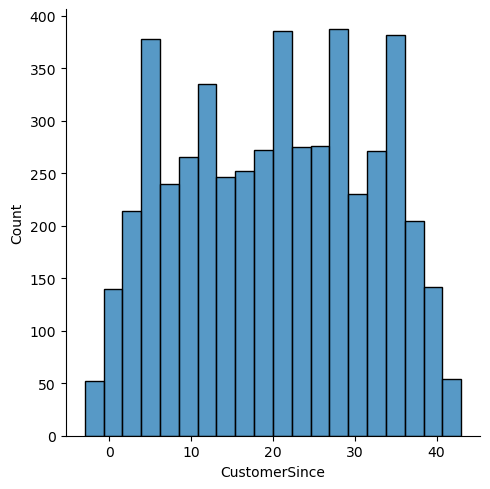

In [370]:
#Plot the boxplot and histogram for the column CustomerSince and identify the outliers 
sns.boxplot(x = 'CustomerSince', data = data,  orient = 'h')
plt.show()
sns.displot(x = data['CustomerSince'])
plt.show()

In [371]:
#Calculate the total outliers
q25, q75 = np.percentile(data['CustomerSince'],25),np.percentile(data['CustomerSince'], 75)
IQR = q75 - q25
Threshold = IQR * 1.5
lower, upper = q25 - Threshold, q75 + Threshold
Outliers=[i for i in data['CustomerSince'] if i < lower or i > upper]
print('Total Number of outliers in CustomerSince: {}'.format(len(Outliers)))

Total Number of outliers in CustomerSince: 0


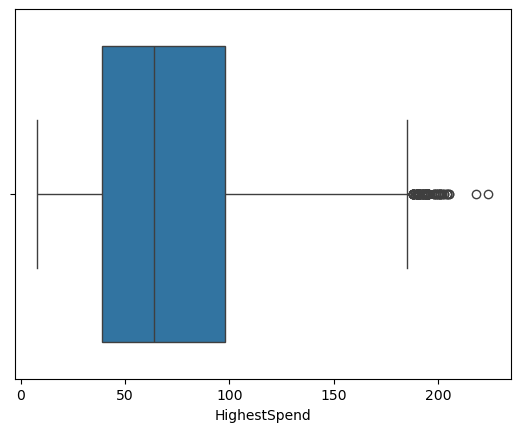

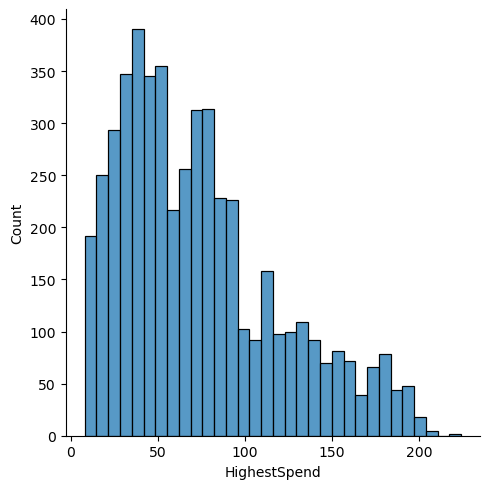

In [372]:
#Plot the boxplot and histogram for the column HighestSpend and identify the outliers 
sns.boxplot(x = 'HighestSpend', data = data,  orient = 'h')
plt.show()
sns.displot(x = data['HighestSpend'])
plt.show()

In [373]:
#Calculate the total outliers
q25, q75 = np.percentile(data['HighestSpend'],25),np.percentile(data['HighestSpend'], 75)
IQR = q75 - q25
Threshold = IQR * 1.5
lower, upper = q25 - Threshold, q75 + Threshold
Outliers=[i for i in data['HighestSpend'] if i < lower or i > upper]
print('Total Number of outliers in HighestSpend: {}'.format(len(Outliers)))

Total Number of outliers in HighestSpend: 96


**Observations:**
- We can see positive skewness in the data
- In one transaction highest spend amount is between 45 to 100. Here the units are masked
- We can see 96 Outliers. Few customers spent more than 200 as well
- But these are valid amount and hence we are not treating these outlisers

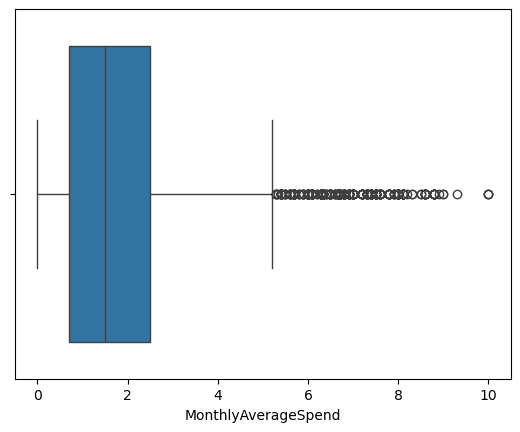

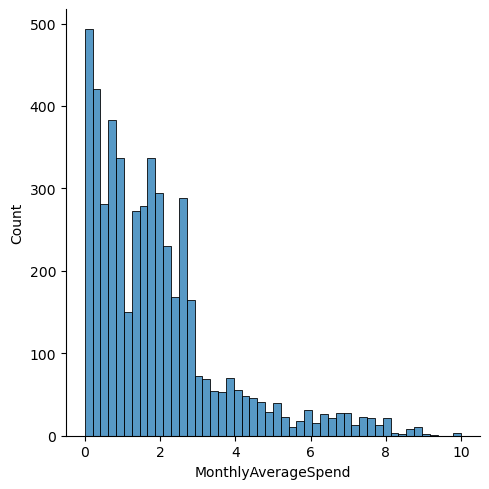

In [374]:
#Plot the boxplot and histogram for the column MonthlyAverageSpend and identify the outliers 
sns.boxplot(x = 'MonthlyAverageSpend', data = data,  orient = 'h')
plt.show()
sns.displot(x = data['MonthlyAverageSpend'])
plt.show()

In [375]:
#Calculate the total outliers
q25, q75 = np.percentile(data['MonthlyAverageSpend'],25),np.percentile(data['MonthlyAverageSpend'], 75)
IQR = q75 - q25
Threshold = IQR * 1.5
lower, upper = q25 - Threshold, q75 + Threshold
Outliers=[i for i in data['MonthlyAverageSpend'] if i < lower or i > upper]
print('Total Number of outliers in MonthlyAverageSpend: {}'.format(len(Outliers)))

Total Number of outliers in MonthlyAverageSpend: 324


**Observations:**
- We can see huge positive skewness in the data
- Monthly average spend of the customer are mostly between 1 to 3(Units are masked)
- There is more number of outliers.This tells some customers spent huge amount as well

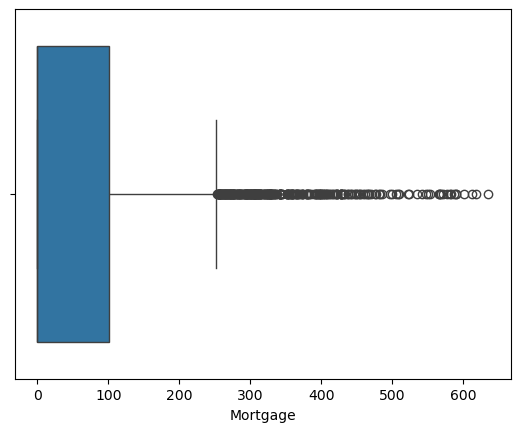

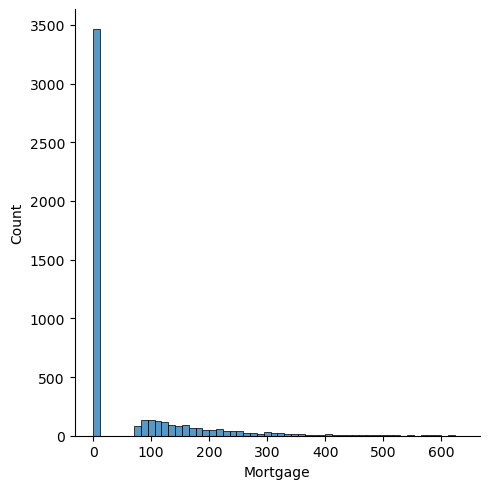

In [376]:
#Plot the boxplot and histogram for the column Mortgage and identify the outliers 
sns.boxplot(x = 'Mortgage', data = data,  orient = 'h')
plt.show()
sns.displot(x = data['Mortgage'])
plt.show()

In [377]:
#Calculate the total outliers
q25, q75 = np.percentile(data['Mortgage'],25),np.percentile(data['Mortgage'], 75)
IQR = q75 - q25
Threshold = IQR * 1.5
lower, upper = q25 - Threshold, q75 + Threshold
Outliers=[i for i in data['Mortgage'] if i < lower or i > upper]
print('Total Number of outliers in Mortgage: {}'.format(len(Outliers)))

Total Number of outliers in Mortgage: 291


**Observations:**
- We can see huge positive skewness in the data

**Observations:**
- The columns ID, Zipcode do not need any analysis as these are personal details.

# <a name='link4'>3) Data Preparation and model building</a>

## <a name='link41'>3.1) Split data into X and Y</a>

In [378]:
#Populate X_data and Y_data
X_data = data.drop(labels=['ID', 'ZipCode', 'LoanOnCard'], axis=1)
Y_data = data['LoanOnCard']

In [379]:
#Verify the X_Data
X_data.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [380]:
#Verify the Y_data
Y_data.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: LoanOnCard, dtype: float64

## <a name='link42'>3.2) Split data into train and test. Keep 25% data reserved for testing</a>

In [381]:
# Split data into train and test. Keep 25% data reserved for testing.
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(X_data, Y_data, test_size=0.25)

In [382]:
#Check the X_data_train
X_data_train.shape

(3750, 11)

In [383]:
#Check the X_data_test
X_data_test.shape

(1250, 11)

In [384]:
#Check the Y_data_train
Y_data_train.shape

(3750,)

In [385]:
#Check the Y_data_test
Y_data_test.shape

(1250,)

## <a name='link43'>3.3) Train a Supervised Learning Classification base model - Logistic Regression</a>

In [386]:
# Train a Supervised Learning Classification base model - Logistic Regression.
lr = LogisticRegression(max_iter = 1203) 
# with defualt max_iter, got the error: ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# Any max_iter less than 1203 failed with the error. Hence chose 1203
lr.fit(X_data_train, Y_data_train)

LogisticRegression(max_iter=1203)

## <a name='link44'>3.4) Print evaluation metrics for the model and clearly share insights</a>

Accuracy on Training data: 0.9517333333333333
Accuracy on Test data: 0.952
Confusion metrics: 
 [[1122   18]
 [  42   68]]




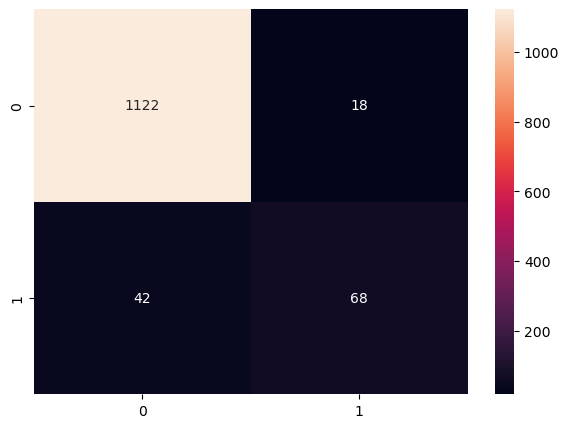

Classification Report:  
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1140
         1.0       0.79      0.62      0.69       110

    accuracy                           0.95      1250
   macro avg       0.88      0.80      0.83      1250
weighted avg       0.95      0.95      0.95      1250



ROC_AUC score: 0.8


In [387]:
# Print evaluation metrics for the model and clearly share insights.

print('Accuracy on Training data:',lr.score(X_data_train, Y_data_train))
print('Accuracy on Test data:',lr.score(X_data_test, Y_data_test))

Y_data_test_predict = lr.predict(X_data_test)
cm1 = metrics.confusion_matrix(Y_data_test, Y_data_test_predict)
print('Confusion metrics: \n', cm1)
print('\n')

df_cm1 = pd.DataFrame(cm1)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm1, annot=True ,fmt='g')
plt.show()

print('Classification Report:  \n', metrics.classification_report(Y_data_test, Y_data_test_predict))
print('\n')
print('ROC_AUC score:', metrics.roc_auc_score(Y_data_test, Y_data_test_predict).round(2))

**Observations:**
- Though the accuracy is 91%, the recall of minority class is very less. So we can say that our model is biased towards majority class
- Here you can see model is poor in predicting class 1 compared to class 0
- Accuracy is good but in this case we need to look on recall value
- Here Recall tells that only 48% class 1 is predicted correctly from actual values
- We dont have enough sample of class 1 to train the model
- We will do the sampling and check how recall values improves in this case

## <a name='link45'>3.5) Balance the data using the right balancing technique</a>

### <a name='link451'>3.5.1) Check distribution of the target variable</a>

In [388]:
# check distribution of target variable
percent_dist_tv = (data.LoanOnCard.value_counts() / data.LoanOnCard.value_counts().sum()) * 100
percent_dist_tv

LoanOnCard
0.0    90.4
1.0     9.6
Name: count, dtype: float64

### <a name='link452'>3.5.2) Say output is class A : 20% and class B : 80%</a>

**Observations:**
- We can see imbalanced distribution of classes in the target variable.
- 90.4% belong to class'0.0' and 9.6% belong to class'1.0'.

### <a name='link453'>3.5.3) Here you need to balance the target variable as 50:50</a>

**Observations:**
- To overcome this problem we will use oversampling technique called SMOTE.

### <a name='link454'>3.5.4) Try appropriate method to achieve the same</a>

In [389]:
# balance the target variable as 50:50
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_data_train_res, Y_data_train_res = smote.fit_resample(X_data_train, Y_data_train)

In [390]:
# again check distribution of target variable on train data
Y_data_train_res.value_counts()

LoanOnCard
0.0    3380
1.0    3380
Name: count, dtype: int64

**Observations:**
- Thus, we have balanced the target variable as 50:50.

## <a name='link46'>3.6) Again train the same previous model on balanced data</a>

In [391]:
# Again train the same previous model on balanced data.
lr.fit(X_data_train_res, Y_data_train_res)

LogisticRegression(max_iter=1203)

## <a name='link47'>3.7) Print evaluation metrics and clearly share differences observed</a>

Accuracy on Training data: 0.9056
Accuracy on Test data: 0.884
Confusion metrics: 
 [[1006  134]
 [  11   99]]




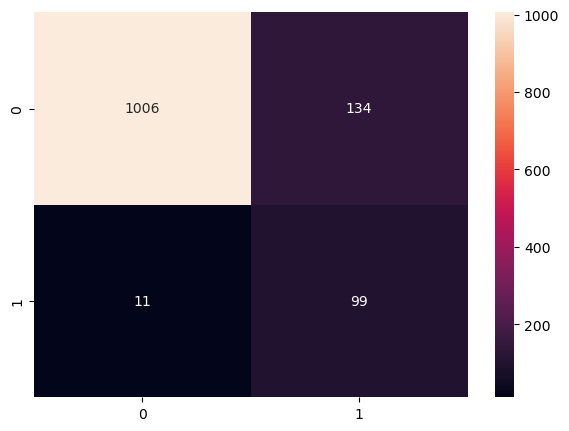

Confusion metrics: 
 [[1006  134]
 [  11   99]]


Classification Report:  
               precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      1140
         1.0       0.42      0.90      0.58       110

    accuracy                           0.88      1250
   macro avg       0.71      0.89      0.76      1250
weighted avg       0.94      0.88      0.90      1250



ROC_AUC score: 0.89


In [392]:
# Print evaluation metrics and clearly share differences observed.

print('Accuracy on Training data:',lr.score(X_data_train, Y_data_train))
print('Accuracy on Test data:',lr.score(X_data_test, Y_data_test))

Y_data_test_new_predict = lr.predict(X_data_test)

cm2 = metrics.confusion_matrix(Y_data_test, Y_data_test_new_predict)
print('Confusion metrics: \n', cm2)
print('\n')

df_cm2 = pd.DataFrame(cm2)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot = True , fmt = 'g')
plt.show()

print('Confusion metrics: \n', cm2)
print('\n')
print('Classification Report:  \n', metrics.classification_report(Y_data_test, Y_data_test_new_predict))
print('\n')
print('ROC_AUC score:', metrics.roc_auc_score(Y_data_test, Y_data_test_new_predict).round(2))

**Observations:**
- ROC_AUC score has improved from 0.79 to 0.89.

# <a name='link5'>4) Performance Improvement</a>

## <a name='link51'>4.1) Train a base model each for SVM, KNN</a>

In [393]:
# SVM base model
svm_base_model = SVC()
svm_base_model.fit(X_data_train, Y_data_train)

# KNN base model
knn_base_model = KNeighborsClassifier()
knn_base_model.fit(X_data_train, Y_data_train)

KNeighborsClassifier()

## <a name='link52'>4.2) Tune parameters for each of the models wherever required and finalize a model</a>

In [394]:
# Tune parameters for svm model with default kernel 'rbf' using different values of 'C' and 'gamma'
c_values = []
gamma_values = []
accuracy = []
precision = []
recall = []
f1_score = []

C = [0.001,0.01,0.1,1,100,1000]
gamma = [0.001,0.01,0.1,1,100,1000]
for i in C:
    for j in gamma:
        svm_model = SVC(C = i, gamma = j)
        svm_model.fit(X_data_train, Y_data_train)
        Y_data_test_svm_predict = svm_model.predict(X_data_test)
        c_values.append(i)
        gamma_values.append(j)
        accuracy.append(metrics.accuracy_score(Y_data_test,Y_data_test_svm_predict))
        precision.append(metrics.precision_score(Y_data_test, Y_data_test_svm_predict, zero_division = 0))
        recall.append(metrics.recall_score(Y_data_test, Y_data_test_svm_predict))
        f1_score.append(metrics.f1_score(Y_data_test, Y_data_test_svm_predict))

In [395]:
# Create a score table with different values of 'C' and 'gamma'
d = {'C': c_values, 'Gamma': gamma_values, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'f1-score': f1_score}
pd.DataFrame(data = d)

,C,Gamma,Accuracy,Precision,Recall,f1-score
0,0.001,0.001,0.9120,0.000000,0.000000,0.000000
1,0.001,0.010,0.9120,0.000000,0.000000,0.000000
2,0.001,0.100,0.9120,0.000000,0.000000,0.000000
3,0.001,1.000,0.9120,0.000000,0.000000,0.000000
4,0.001,100.000,0.9120,0.000000,0.000000,0.000000
5,0.001,1000.000,0.9120,0.000000,0.000000,0.000000
6,0.010,0.001,0.9120,0.000000,0.000000,0.000000
7,0.010,0.010,0.9120,0.000000,0.000000,0.000000
8,0.010,0.100,0.9120,0.000000,0.000000,0.000000
9,0.010,1.000,0.9120,0.000000,0.000000,0.000000


**Observations:**
- From the above dataframe, we can say that the SVM model with C=1000 and gamma=0.001 gives the highest accuracy 0.9472

In [396]:
# Tune parameters of the knn model
weights_param = []
n_neighbors_param = []
accuracy_knn = []
precision_knn = []
recall_knn = []
f1_score_knn = []

weights = ['uniform', 'distance']
n_neighbors = [num for num in list(range(1,40)) if num % 2 != 0]

for w in weights:
    for n in n_neighbors:
        knn_model = KNeighborsClassifier(n_neighbors = n, weights = w)
        knn_model.fit(X_data_train, Y_data_train)
        Y_data_test_knn_predict = knn_model.predict(X_data_test)
        weights_param.append(w)
        n_neighbors_param.append(n)
        accuracy_knn.append(metrics.accuracy_score(Y_data_test, Y_data_test_knn_predict))
        precision_knn.append(metrics.precision_score(Y_data_test, Y_data_test_knn_predict))
        recall_knn.append(metrics.recall_score(Y_data_test, Y_data_test_knn_predict))
        f1_score_knn.append(metrics.f1_score(Y_data_test, Y_data_test_knn_predict))

In [397]:
# Create a score table with different values of 'Weights' and 'K'
p = {'Weights': weights_param, 'K-Value': n_neighbors_param, 'Accuracy': accuracy_knn, 'Precision': precision_knn, 'Recall': recall_knn, 'f1-score': f1_score_knn}
pd.DataFrame(data = p)

,Weights,K-Value,Accuracy,Precision,Recall,f1-score
0,uniform,1,0.9088,0.478261,0.400000,0.435644
1,uniform,3,0.9032,0.435294,0.336364,0.379487
2,uniform,5,0.9024,0.414286,0.263636,0.322222
3,uniform,7,0.9088,0.468750,0.272727,0.344828
4,uniform,9,0.9128,0.508772,0.263636,0.347305
5,uniform,11,0.9120,0.500000,0.245455,0.329268
6,uniform,13,0.9168,0.562500,0.245455,0.341772
7,uniform,15,0.9136,0.521739,0.218182,0.307692
8,uniform,17,0.9176,0.574468,0.245455,0.343949
9,uniform,19,0.9200,0.613636,0.245455,0.350649


**Observations:**
- From the above dataframe, we can say that the KNN model with weights = 'distance' and n_neighbors = 37 gives the highest accuracy.
- On comparing the SVM and KNN model, the SVM model is the best as it gives the highest accuracy, precision, recall and f1 score. Hence our final model is the SVM model with C=1000 and gamma=0.001.

## <a name='link53'>4.3) Print evaluation metrics for final model</a>

Accuracy on Training data: 0.9944
Accuracy on Test data: 0.9544


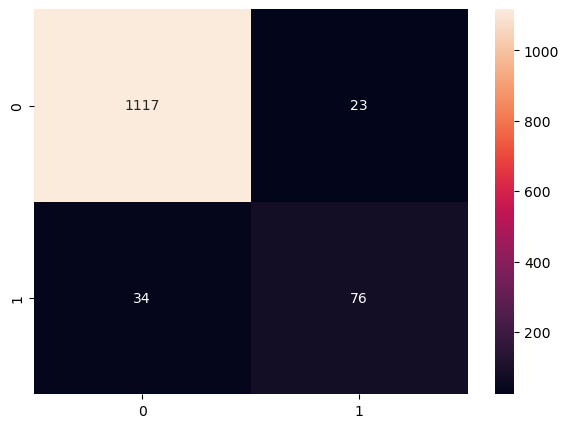

Confusion Matrix of the final model: 
 [[1117   23]
 [  34   76]]


Classification Report of the final model: 
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      1140
         1.0       0.77      0.69      0.73       110

    accuracy                           0.95      1250
   macro avg       0.87      0.84      0.85      1250
weighted avg       0.95      0.95      0.95      1250



ROC_AUC Score of the final model: 0.84


In [398]:
#Replace the C and gamma and populate the new model
svm_final = SVC(C=1000, gamma=0.001)
svm_final.fit(X_data_train, Y_data_train)

print('Accuracy on Training data:', svm_final.score(X_data_train, Y_data_train) )
print('Accuracy on Test data:',svm_final.score(X_data_test, Y_data_test) )

Y_data_test_svc_predict2 = svm_final.predict(X_data_test)
cm3 = metrics.confusion_matrix(Y_data_test, Y_data_test_svc_predict2)

df_cm3 = pd.DataFrame(cm3)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm3, annot = True , fmt = 'g')
plt.show()

print('Confusion Matrix of the final model: \n', cm3)
print('\n')
print('Classification Report of the final model: \n', metrics.classification_report(Y_data_test, Y_data_test_svc_predict2))
print('\n')
print('ROC_AUC Score of the final model:', metrics.roc_auc_score(Y_data_test, Y_data_test_svc_predict2).round(2))

**Observations:**
- The accuracy on the test data is increased to 95%

## <a name='link54'>4.4) Share improvement achieved from base model to final model</a>

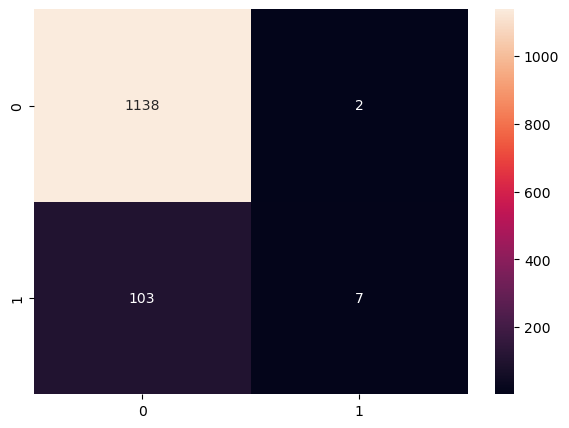

Confusion Matrix of the svm base model: 
 [[1138    2]
 [ 103    7]]


Classification Report of the svm base model: 
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1140
         1.0       0.78      0.06      0.12       110

    accuracy                           0.92      1250
   macro avg       0.85      0.53      0.54      1250
weighted avg       0.90      0.92      0.88      1250



ROC_AUC Score of the svm base model: 0.53


In [399]:
# print evaluation metrics for SVM base model and compare with the final one.
Y_data_test_svc_predict3 = svm_base_model.predict(X_data_test)

cm4 =  metrics.confusion_matrix(Y_data_test, Y_data_test_svc_predict3)

df_cm4 = pd.DataFrame(cm4)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm4, annot = True , fmt = 'g')
plt.show()

print('Confusion Matrix of the svm base model: \n', cm4)
print('\n')
print('Classification Report of the svm base model: \n', metrics.classification_report(Y_data_test, Y_data_test_svc_predict3))
print('\n')
print('ROC_AUC Score of the svm base model:', metrics.roc_auc_score(Y_data_test, Y_data_test_svc_predict3).round(2))